In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import odeint
from scipy.integrate import quad
import seaborn as sns
from matplotlib import rcParams
from matplotlib.colors import LogNorm
import matplotlib.colors as colors
from matplotlib.ticker import LogFormatter 
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})    


π = np.pi
G = 4.4959e-15            #in units of M☉^-1 pc^3 yr^-2
c = 0.3068                #in units of pc yr^-1
ρ_eq = 3.1812e3           #in units of M☉ pc^-3 with ρ_eq=2.15368e-16 kg m^-3
pc = 3.0857e16            # in meters
yr = 3.154e7              # in units of seconds
t_eq = 1.59246e12/yr      # in units of seconds
t_m = 13.78e9             #in units of yrs corresponding to t_0=13.78Gyr
t_0 = 13.78e9             #in units of yrs corresponding to t_0=13.78Gyr

σ_eq = 0.005
ρ_m = 4e19                #ρ_m = 4e19 M☉ Gpc^-3





m_1 = 6
m_2 = 8

y_1 = np.log(m_1)
y_2 = np.log(m_2)
dy = (y_2-y_1)


y_list = np.zeros(10)

for i in range(len(y_list)):
    y_list[i]= (y_1 + (i*dy))
    

M_1_list = np.zeros(len(y_list))
M_2_list = np.zeros(len(y_list))

for i, y in enumerate(y_list):
    M_1_list[i] = (np.ceil(np.exp(y)))
    M_2_list[i] = (np.ceil(np.exp(y)))
    

            
m_1_list=[int(M_1) for M_1 in M_1_list]
m_2_list=[int(M_2) for M_2 in M_2_list]

    
Δ_1_list=np.zeros(len(y_list))
Δ_2_list=np.zeros(len(y_list))

for i, y in enumerate(y_list):
    Δ_1_list[i] = np.exp(y + 0.5*dy) - np.exp(y - 0.5*dy)
    Δ_2_list[i] = np.exp(y + 0.5*dy) - np.exp(y - 0.5*dy) 

    
print("m_1 = ", m_1_list)

f = np.geomspace(1e-4, 1, 10)
f_pbh = f/0.85
f_pbh_list = f_pbh.tolist()


m_min = 5
m_max = 100


X_min = 1e-5
X_max = 1e5

m_1 =  [6, 8, 11, 15, 19, 26, 34, 45, 60, 80]


Merger_PWR_Huang_paper = [7.45814437e-02 5.77015998e-01 4.44157883e+00 3.29881283e+01
 2.08173638e+02 1.02220967e+03 4.52228846e+03 1.96441043e+04
 8.51196024e+04 3.68711765e+05]


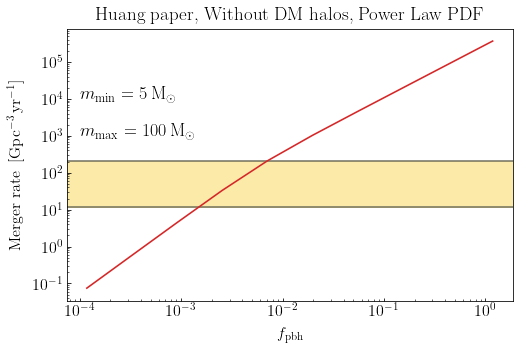

In [3]:
# Plot of merger vs f_pbh as per Huang Paper to calculate f_pbh at R_12 = 100  Gpc⁻3 yr⁻1.

# merger rate for Δ_1=Δ_2=Δ.
def Merger_equal_deltas(m_1, m_2, t_m):
   
        return 3.9e6 * (f**2) *((t_m/t_0)**(-34/37))* ((f**2 + σ_eq**2)**(-21/74)) * min((P(m_1))/m_1, (P(m_2))/m_2) * ((P(m_1))/m_1 + (P(m_2))/m_2) * ((m_1*m_2)**(3/37)) * ((m_1+m_2)**(36/37))
    
    
    

# Calculation of the 2D merger rate for Powerlaw PBH mass distribution. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.


Merger_PWR = np.zeros((10, 10))
merge_PWR = np.zeros(len(m_1_list))



for z, f_pbh in enumerate(f_pbh_list):
    
    
    for i, (m_1, Δ_1)  in enumerate(zip(m_1_list, Δ_1_list)):
        
        
        
        for j, (m_2, Δ_2)  in enumerate(zip(m_2_list, Δ_2_list)):
            
            f = f_pbh * 0.85
            
            def P(m): #Powerlaw PBH mass distribution
                α = 1.6
                M = 5     #in units of M☉, for PBHs mass range of m_min = 5 M☉ - m_min = 100 M☉ .
                return ((α-1)/M) * ((m/M)**(-α))

            if i==j:
                Merger_PWR[i,j] = 0.5 * Merger_equal_deltas(m_1, m_2, t_m) * Δ_1 * Δ_2
            
            else:
                Merger_PWR[i,j] =  Merger_equal_deltas(m_1, m_2, t_m) * Δ_1 * Δ_2
            
            
            if m_1 < m_2 or m_1 != m_2 and m_1 + m_2 > 100:
          
                merge_PWR[z] +=   0
            
            else:
                merge_PWR[z] +=  Merger_PWR[i,j]
            
            
    
            

print("Merger_PWR_Huang_paper =", merge_PWR)        
        
plt.figure(figsize = (8, 5))
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

plt.axhline(y = 12, color = '#6E705E')
plt.axhline(y = 213, color = '#6E705E')
plt.axhspan(12, 213, 1e-4, 1, color='#FBDD70', alpha=0.6)


plt.text(1e-4, 1e4, "$m_\mathrm{{min}} = 5 \: \mathrm{M_{\odot}}$", size = 18)
plt.text(1e-4, 1e3, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 18)


plt.rc('lines', linewidth = 1.6)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.loglog(f_pbh_list, merge_PWR, 'C3')
plt.xlabel('$f_\mathrm{{pbh}}$', fontsize = 16, labelpad = 9)
plt.ylabel('Merger  rate $\,[\mathrm{Gpc^{-3}\,yr^{-1}}]$', fontsize = 16, labelpad = 9)
plt.title('Huang paper, Without DM halos, Power Law PDF', fontsize = 19, pad = 9)
plt.show()

In [4]:
f_pbh_PWR_100 = np.interp(100, merge_PWR, f_pbh_list)
print("f_pbh_PWR_100 =", '%0.2e'%f_pbh_PWR_100)



f_pbh_PWR_100 = 4.26e-03


Total Merger rate = 86.77034158009324 Gpc^{-3} yr^{-1}


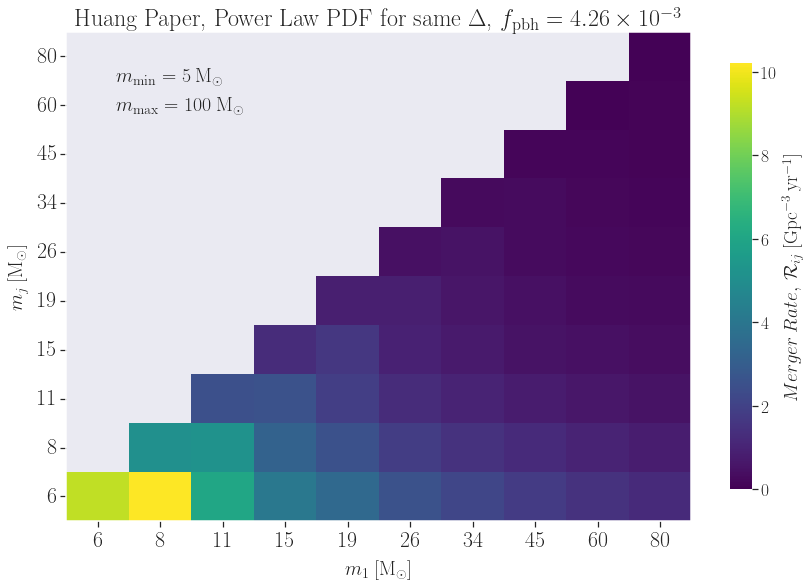

In [5]:


# This is the plot of the merger rate as f_pbh = 4.26e-3 as calculated in the previous cell.


# Calculation of the 2D merger rate for Powerlaw PBH mass distribution. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2 with Δ_1=Δ_2=Δ.



Merger_PWR = np.zeros((10, 10))

merger_sum = 0
for i, (m_1, Δ_1)  in enumerate(zip(m_1_list, Δ_1_list)):
    merger = 0
    for j, (m_2, Δ_2) in enumerate(zip(m_2_list, Δ_2_list)):
        
        f_pbh = 4.26e-3
        f = 0.85*f_pbh
   
        def P(m):     #Powerlaw PBH mass distribution
            α = 1.6
            M = 5       #in units of M☉
            return ((α-1)/M) * ((m/M)**(-α))


        if i==j:
            Merger_PWR[i, j] = 0.5 * Merger_equal_deltas(m_1, m_2, t_m) * Δ_1 * Δ_2
            
        else:
            Merger_PWR[i, j] = Merger_equal_deltas(m_1, m_2,  t_m) * Δ_1 * Δ_2
        
        
        if m_1 < m_2 or m_1 != m_2 and m_1 + m_2 > 100:
             
                merger_sum +=  0
                
        else:
              merger_sum +=   Merger_PWR[i,j] 
            
        
print("Total Merger rate =", merger_sum, 'Gpc^{-3} yr^{-1}')




sns.set(font_scale = 1.6)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'




mask = np.tril(np.ones((10,10)), k = -1)  #created an array of shape Merger_12 with all the elements in it being 0.
fig,ax = plt.subplots(figsize=(14, 9))  


ax = sns.heatmap(Merger_PWR, mask = mask,  cmap = 'viridis', cbar = True,   
                 cbar_kws = { "shrink": 0.87, 'label': '$Merger \: Rate, \: \mathcal{R}_{ij} \: [\mathrm{Gpc}^{-3} \, \mathrm{yr}^{-1}]$'},
                  vmin = 0)




ax.set_xticklabels(m_2_list, fontsize = 10)
ax.set_yticklabels(m_1_list, rotation = 360, fontsize = 10)
ax.tick_params(left = True,  bottom = True)

#ax.text(0.8, 9, "$X_\mathrm{min} = 10^{-5} \: \mathrm{M_{\odot}}$", size = 19)
#ax.text(0.8, 8.4, "$X_\mathrm{max} = 10^{5} \: \mathrm{M_{\odot}}$", size = 19)

ax.text(0.8, 9, "$m_\mathrm{{min}} = 5 \: \mathrm{M_{\odot}}$", size = 20)
ax.text(0.8, 8.4, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 20)


# make frame visible
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1.5)
    
    
ax.invert_yaxis()
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)
plt.xlabel('$m_{1}\:[\mathrm{M_{\odot}}]$', fontsize = 20, labelpad = 9)     # m_j = m_2
plt.ylabel('$m_{j}\: [\mathrm{M_{\odot}}]$', fontsize = 20, labelpad = 9)    # m_i = m_1  and m_2 < equal to m_1.    
plt.title(r'Huang Paper, Power Law PDF for same $\Delta$,  $f_\mathrm{pbh} = 4.26 \times 10^{-3}$', fontsize = 24)
plt.savefig('Huang, Powerlaw PDF for same Δ.pdf')
plt.show()     